# Ensemble methods
In the realm of machine learning, the age-old adage, 'Unity is strength,' resonates profoundly, encapsulating the fundamental principle governing the remarkably potent 'ensemble methods.' These methods harness the collective power of multiple learning models, harmoniously working together to achieve remarkable outcomes.

In this notebook, different ensemble models and some concepts will be explaines in details. This educational notebook is based on this <a href="https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205" target="_blank">link</a>.

### Introduction
Ensemble learning represents a powerful machine learning paradigm wherein numerous models, often referred to as "weak learners," are individually trained to tackle the same problem and subsequently integrated to yield enhanced results. The central hypothesis underlying this approach is that through the proper amalgamation of these weak models, we can attain significantly improved accuracy and/or robustness in the final model.

The most fundamental traits desired in a model are low bias and low variance, even though they frequently exhibit opposite tendencies. Achieving a balance between these two attributes is crucial for effectively addressing a problem. On one hand, the model should possess sufficient degrees of freedom to adequately capture the intricate complexities of the data at hand, enabling it to "solve" the problem. On the other hand, excessive degrees of freedom must be avoided to prevent high variance and ensure robustness. This well-known phenomenon is referred to as the bias-variance tradeoff. <a href="https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff" target="_blank">wiki</a>

### Weak Learners
In ensemble learning theory, weak learners, also known as base models, serve as foundational building blocks for constructing more intricate models through their combination. Typically, these base models do not perform optimally in isolation, either due to a high bias resulting from limited degrees of freedom or excessive variance that compromises their robustness, owing to excessive degrees of freedom. The concept behind ensemble methods is to mitigate these shortcomings by aggregating multiple weak learners, thus creating a robust learner or ensemble model capable of achieving superior performance. By leveraging the strengths of individual weak learners and compensating for their weaknesses, the ensemble model aims to strike a balance, effectively reducing bias and/or variance and attaining improved overall performance.

### Combining Weak Learners
When setting up an ensemble learning method, the initial step involves selecting the base models to be aggregated. In many cases, such as in the well-known bagging and boosting methods, a single base learning algorithm is employed to ensure that homogeneous weak learners are utilized, each trained in distinct ways. This yields a resulting ensemble model that is referred to as "homogeneous." Nevertheless, there are alternative methods that employ diverse types of base learning algorithms, resulting in heterogeneous weak learners being combined to form a "heterogeneous ensemble model."

A crucial consideration in this process is to ensure coherence between our choice of weak learners and the aggregation method employed. If we opt for base models with low bias but high variance, the aggregating method should aim to reduce variance. Conversely, if we select base models with low variance but high bias, the aggregating method should be designed to mitigate bias. By aligning the characteristics of the weak learners and the aggregation strategy, we optimize the ensemble's performance and achieve a more effective and balanced model.

In ensemble learning, we encounter three prominent methods: bagging, boosting, and stacking, each with distinct characteristics and objectives.

1. **Bagging**: primarily employs homogeneous weak learners and trains them independently in parallel. It then combines their predictions through a      deterministic averaging process. The emphasis is on reducing variance and enhancing the model's overall robustness.

2. **Boosting**: like bagging, often employs homogeneous weak learners. However, it adopts a sequential and adaptive approach, where each subsequent weak learner's training depends on the performance of the previous ones. The final model combines the predictions using a deterministic strategy, aiming to improve both accuracy and generalization.

3. **Stacking**: on the other hand, embraces heterogeneous weak learners. It trains them in parallel and then leverages a meta-model to blend their predictions effectively. By learning from the outputs of different weak models, stacking aims to create a robust and versatile ensemble model capable of superior performance.

These techniques are related and are crucial to understand as they are valuable in a plethora of circumstances. They are based on the idea that a combination of multiple models produce a more powerful estimator. They are ensemble methods. 

Keep this in mund that In broad terms, bagging primarily aims to construct an ensemble model with reduced variance compared to its individual components. On the other hand, boosting and stacking predominantly strive to create robust models that exhibit lower bias than their constituent models (while also potentially reducing variance). Though variance reduction is an essential consideration for boosting and stacking, their primary emphasis remains on achieving enhanced model strength with minimized bias.


In [107]:
# General moduls
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import time
from matplotlib.colors import ListedColormap
import seaborn as sns

# Data generating and feature modules
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_circles

# preprocessing modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

# Classification modules
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.dummy import DummyClassifier
from sklearn import tree

# meta-Model modules
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV

# Evaluation modules
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Parallel Methods
Bagging stands for bootstrap aggregating and consists of training several models in parallel with replacement. Let's get into boostrapping first.

### Bootstrapping
Let's commence by establishing the concept of bootstrapping. This statistical methodology involves creating sets of samples, each with a size of B (referred to as bootstrap samples), from an initial dataset of size N. This is achieved by randomly selecting B observations with replacement.

Given a dataset $N$, generate bootstrap samples of size $B$ by randomly drawing with replacement $B$ observations.

$$N= \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix}$$

Given $B = 3$

$$\text{Bootstrap samples} = \begin{bmatrix} 1 & 3 & 8 \\ 7 & 6 & 6 \\ ... \\ 9 & 3 & 2 \end{bmatrix}$$

Subject to certain assumptions, these samples exhibit favorable statistical properties. As a preliminary approximation, they can be regarded as drawn directly from the actual underlying (often unknown) data distribution and as independent selections from one another. Thus, they can be treated as representative and uncorrelated samples originating from the genuine data distribution. The hypothesis that must be confirmed to ensure the validity of this approximation are twofold. Firstly, the initial dataset's size N should be sufficiently large to encompass the majority of the underlying distribution's complexity, allowing sampling from the dataset to well approximate sampling from the actual distribution (representativeness). Secondly, the dataset's size N should significantly exceed the bootstrap samples' size B, preventing excessive correlation among samples (independence). Keep in mind that this technique is an approximation.

Bootstrap samples find frequent application, such as in assessing the variance or confidence intervals of statistical estimators. Essentially, a statistical estimator is a function derived from observations, thus constituting a random variable with variance emanating from these observations. To gauge the variance of such an estimator, it becomes necessary to assess it across numerous independent samples drawn from the relevant distribution. However, in many cases, the sheer demand for genuinely independent samples surpasses the available data volume. Consequently, bootstrapping comes into play, generating a series of bootstrap samples which can be deemed as "almost representative" and "almost independent" (almost i.i.d. samples). These bootstrap samples serve as a means to approximate the estimator's variance by computing its value across each of these samples.

### Bagging
When training a model, whether for classification or regression, a function is derived from the training dataset to map inputs to outputs. However, due to the inherent variance in the training dataset—a sample drawn from an underlying distribution—the resulting model exhibits variability. This stems from the fact that a different dataset would yield a different model. Bagging addresses this issue by aiming to create multiple quasi-independent models and averaging their predictions to produce a model with reduced variance. In practice, generating fully independent models is unfeasible due to data limitations. Instead, the approach relies on the favorable "approximate properties" of bootstrap samples, which offer representativeness and a semblance of independence. These bootstrap samples serve as the foundation for fitting models that exhibit a degree of independence, contributing to the overall model's enhanced stability.

To initiate the process, we generate numerous bootstrap samples, where each new sample effectively serves as an additional (nearly) independent dataset derived from the true distribution. Subsequently, a weak learner is trained for each of these samples, and their outcomes are aggregated. This aggregation can be thought of as a form of "averaging" the outputs, resulting in an ensemble model characterized by diminished variance compared to its constituent components.

So, assuming that we have L bootstrap samples of size B denoted

$$
\{z_{1}^{1}, z_{2}^{1}, \ldots, z_{B}^{1}\}, \{z_{1}^{2}, z_{2}^{2}, \ldots, z_{B}^{2}\}, \ldots, \{z_{1}^{L}, z_{2}^{L}, \ldots, z_{B}^{L}\}
$$

$\{z_{b}^{l}\}$ refers to b-th observation of the l-th bootstrap sample. One can fit a model to each of these bootstrap sample to make base models.

$$
w_{1}, w_{2}, \dots, w_{L}
$$

and then aggregate them into some kind of averaging process in order to get an ensemble model with a lower variance. For example, we can define our strong model such that

$$
s_{L} = \frac{1}{L}\sum_{l=1}^{L}w_{l}
$$

is the simple average used in regression problems. Also:

$$
s_{L} = arg_{k}max[card(l|w_{l}=k)]
$$

is used in classification problems and is called hard-voting. The class generated by each model can be viewed as a vote, and the ensemble model returns the class that garners the majority of these votes. In the context of classification problems, another approach involves examining the probabilities assigned to each class by all models. These probabilities are averaged, and the class associated with the highest average probability is selected (referred to as soft-voting). Averages or votes can be either straightforward or weighted, incorporating relevant weights as needed.

### sklearn.ensemble.BaggingClassifier
This algorithm encompasses several works from the literature. When random subsets of the dataset are drawn as random subsets of the samples, then this algorithm is known as **Pasting**. If samples are drawn with replacement, then the method is known as **Bagging**. When random subsets of the dataset are drawn as random subsets of the features, then the method is known as **Random Subspaces**. Finally, when base estimators are built on subsets of both samples and features, then the method is known as **Random Patches**. For more information about this algorithm one can go through these links: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html" target="_blank">link1</a>, <a href="https://scikit-learn.org/stable/modules/ensemble.html#bagging" target="_blank">link2</a>.

To show that how one can work with this function, first, we make a random classification data set with 1000 samples and 10 features. There are different parameters that one can tune for this function:

1. **estimator**: The base estimator to fit on random subsets of the dataset. If None, then the base estimator is a DecisionTreeClassifier.

2. **n_estimators**: The number of base estimators in the ensemble.

3. **max_samples**: The number of samples to draw from X to train each base estimator (with replacement by default).

4. **max_features**: The number of features to draw from X to train each base estimator ( without replacement by default)

5. **bootstrap**: Whether samples are drawn with replacement. If False, sampling without replacement is performed.(Pasting or bagging)

6. **bootstrap_features**: Whether features are drawn with replacement.

7. **oob_score**: Whether to use out-of-bag samples to estimate the generalization error. Only available if bootstrap=True.

8. **n_jobs**: The number of jobs to run in parallel for both fit and predict. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.

In [32]:
# make a random dataset
X, y = make_classification(n_samples=1000, n_features=10,
                          n_informative=2, n_redundant=2,
                          random_state=0, shuffle=False)


In [34]:
# make a model
bagging_clf = BaggingClassifier(estimator=SVC(), n_estimators=20, max_samples=500, 
                        max_features=5, bootstrap_features=True, oob_score=True)

# Split the dataset (without any division number, it divide 25% of the data for testing purpose)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Train the model based on training data
bagging_clf.fit(X_train, y_train)


BaggingClassifier(bootstrap_features=True, estimator=SVC(), max_features=5,
                  max_samples=500, n_estimators=20, oob_score=True)

After fitting this model, one can explore various features of the model using its internal attributes. This exploration can help ascertain whether the model encompasses all the features and samples. Additionally, it provides insights into the base classifier estimators, the model's out-of-bag (OOB) score, and other valuable information about the model. Consequently, here I will evaluate some of these attributes to evaluate the validity of my model.

In [4]:
def bagging_attr_extractor(bagging_clf, feature_names=True, oob=True):
    # Number of features seen during fit
    print(f'the number of features accompanying in fitting the model is: {bagging_clf.n_features_in_}\n')

    if feature_names:
        # Names of features seen during fit. (features do not have name in this artificial dataset)
        print(f'the names of features accompanying in fitting the model is:\n{bagging_clf.feature_names_in_}\n')

    # The collection of fitted base estimators.
    print(f'the collection of base estimator:\n{bagging_clf.estimators_}\n')

    # The subset of drawn features for each base estimator.
    print(f'the features contribute to each base classifier:\n{bagging_clf.estimators_features_}\n')
    
    # The classes labels.
    print(f'the classes labels:\n{bagging_clf.classes_}\n')

    # The number of classes.
    print(f'the number of  classes: {len(bagging_clf.classes_)}\n')

    if oob:
        # Score of the training dataset obtained using an out-of-bag estimate. 
        print(f'the out-of-bag score for this model: {bagging_clf.oob_score_}\n')


In [5]:
bagging_attr_extractor(bagging_clf, feature_names=False, oob=True)

the number of features accompanying in fitting the model is: 10

the collection of base estimator:
[SVC(random_state=995158658), SVC(random_state=36040512), SVC(random_state=360886955), SVC(random_state=1535656058), SVC(random_state=712508858), SVC(random_state=1016290454), SVC(random_state=1099048098), SVC(random_state=544975566), SVC(random_state=1798443737), SVC(random_state=300591570), SVC(random_state=1300989049), SVC(random_state=471888148), SVC(random_state=1823993154), SVC(random_state=1364523812), SVC(random_state=2020554984), SVC(random_state=332650438), SVC(random_state=968209490), SVC(random_state=1116879557), SVC(random_state=219196069), SVC(random_state=1267156373)]

the features contribute to each base classifier:
[array([2, 2, 5, 0, 2]), array([0, 7, 3, 8, 9]), array([9, 3, 3, 0, 8]), array([7, 8, 5, 8, 7]), array([2, 0, 1, 8, 0]), array([6, 1, 1, 7, 3]), array([2, 1, 0, 9, 7]), array([6, 3, 9, 5, 8]), array([9, 8, 3, 0, 4]), array([2, 4, 1, 6, 4]), array([9, 5, 2, 9, 2

As evident from the observations, each base estimator contains a nearly distinct set of features due to the use of replacement during bootstrapping. This approach proves advantageous as it preserves the independence of the weak learners. However, a degree of caution is warranted in pursuit of this independence, as overly uncorrelated weak learners might stray from accurately representing the original dataset. Therefore, the selection of an optimal number of features becomes pivotal when employing the bootstrap_features technique.

Furthermore, this model works well for both labels when dealing with binary labels. Yet, it's important to be careful when working with datasets that have multiple classes.

Turning to the Out-of-bag (OOB) score, the model exhibits a exceptional value (0.96), signifying its capability to predict approximately 96% of all testing data instances on average. This assertion finds further substantiation in subsequent predictions. When the model is applied to the X_test data, an accuracy of around 0.95 is attained, harmonizing with the OOB score's prediction.

In [6]:
pred = bagging_clf.predict(X_test)
accuracy_score(y_test, pred)

0.948

This ensemble method comprises numerous parameters that require tuning. As is customary, one of the most effective approaches for parameter tuning is using GridSearchCV. However, a degree of caution is necessary when selecting these parameters accurately.

In [7]:
def multiple_grid_search(estimator_dict, scoring_list, cv_number, refit_method, data_dict):

    final_dict = {}

    for name in estimator_dict.keys():
        
        # Create the GridSearchCV object
        grid_search = GridSearchCV(estimator=estimator_dict[name][0], param_grid=estimator_dict[name][1],
                                    scoring=scoring_list, cv=cv_number, refit=refit_method)
        
        # Fit the the best model to the data
        grid_search.fit(data_dict['x'], data_dict['y'])

        # Save the best estimator for each model
        final_dict[name] = {'best_model': grid_search.best_estimator_,
                            'best_parameters': grid_search.best_params_,
                            'best_score': grid_search.best_score_}

    # order the dictionary based on the magnitude of the scores
    final_dict = dict(sorted(final_dict.items(), key=lambda item: -1 * item[1]['best_score']))
     
    return final_dict

In [82]:
# make parameters dictionaries
# BaggingClassifier
bagging_param = {'estimator': [SVC(), LogisticRegression(), None],
                 'n_estimators': np.arange(10,20,2),
                 'max_samples': np.arange(350,650,100),
                 'max_features': np.arange(5,10,1),
                 'bootstrap': [False, True],
                 'bootstrap_features': [False, True],
                 'n_jobs': [-1]
                }


# Scoring list
scoring_list = ['roc_auc', 'f1', 'accuracy']

# Make estimator dictionary
estimator_dict={'BaggingClassifier': [BaggingClassifier(), bagging_param]}

# Make data dictionary
data_dict =  {'x': X, 
              'y': y}

bagging_best_model = multiple_grid_search(estimator_dict, scoring_list, 10, 'accuracy', data_dict)

In [83]:
bagging_best_model

{'BaggingClassifier': {'best_model': BaggingClassifier(bootstrap=False, bootstrap_features=True, max_features=6,
                    max_samples=350, n_estimators=14, n_jobs=-1),
  'best_parameters': {'bootstrap': False,
   'bootstrap_features': True,
   'estimator': None,
   'max_features': 6,
   'max_samples': 350,
   'n_estimators': 14,
   'n_jobs': -1},
  'best_score': 0.968}}

In [86]:
bagging_attr_extractor(bagging_best_model['BaggingClassifier']['best_model'], feature_names=False, oob=False)

the number of features accompanying in fitting the model is: 10

the collection of base estimator:
[DecisionTreeClassifier(random_state=675795092), DecisionTreeClassifier(random_state=152768582), DecisionTreeClassifier(random_state=338711584), DecisionTreeClassifier(random_state=743664102), DecisionTreeClassifier(random_state=1628129359), DecisionTreeClassifier(random_state=581930552), DecisionTreeClassifier(random_state=1946395244), DecisionTreeClassifier(random_state=551019861), DecisionTreeClassifier(random_state=2054880003), DecisionTreeClassifier(random_state=1392910449), DecisionTreeClassifier(random_state=454698965), DecisionTreeClassifier(random_state=2001349568), DecisionTreeClassifier(random_state=188654661), DecisionTreeClassifier(random_state=398928531)]

the features contribute to each base classifier:
[array([4, 3, 1, 4, 3, 5, 9, 9, 2]), array([6, 7, 1, 6, 9, 0, 3, 5, 2]), array([0, 9, 3, 6, 4, 6, 5, 8, 6]), array([6, 3, 4, 0, 9, 7, 8, 4, 2]), array([4, 8, 6, 8, 6, 8, 5, 

In [87]:
pred = bagging_best_model['BaggingClassifier']['best_model'].predict(X)
accuracy_score(y, pred)

0.991

As mentioned earlier, when the estimator is set to 'None', the function automatically selects Decision Tree as the estimator. In this case, the best model is determined by the performance of decision trees. This choice is due to the fact that bagging tends to achieve optimal results when its estimator is decision trees. This specific combination is referred to as Random Forest, a concept that will be elaborated upon in the subsequent section.

Moreover, this model can achieve the accuracy of 0.969 during training and 0.981 when predictiong, that shows an increase amount of accuracy in comparison with using model without cross validation and tuning parameters.
 
Furthermore, the 'GridSearchCV' method employs cross-validation techniques to enhance credibility and generalizability. Alternatively, the Out-of-Bag (OOB) score can serve the same purpose. However, an issue arises as GridSearchCV exclusively supports cross-validation, thereby necessitating the creation of a method that mirrors GridSearchCV but utilizes the BaggingClassifier and OOB score instead. Consequently, in the final segment of this section, I will present a function that replicates the behavior of GridSearchCV while employing BaggingClassifier and OOB score as the evaluation mechanism.

In [8]:
def gridsearchcv_oob_score(estimator_dict, data_dict):

    final_dict = {}
    counter = 0

    # loop through the models
    for name in estimator_dict.keys():
        estimator_info = estimator_dict[name][1]

        # make different combination of parameters
        param_combinations = product(*[v for k, v in estimator_info.items()])
        params_names = list(estimator_info.keys())

        # loop through different combination of parameters to evaluate the model performance
        for params in param_combinations:

            eval_arguments = ', '.join(f'{params_names[i]}={params[i]}' for i in range(len(params_names)))
            eval_statement = (
                f"{estimator_dict[name][0]}({eval_arguments}, oob_score=True, n_jobs=-1)"
            )
            
            bagging_clf = eval(eval_statement)
            bagging_clf.fit(data_dict['x'], data_dict['y'])

            # save the fitted model in a dictionary
            final_dict[f'model{counter}'] = {'model': bagging_clf,
                                            'parameters': {params_names[i]: params[i] for i in range(len(params_names))},
                                            'oob_score': bagging_clf.oob_score_}
            

            counter += 1           
    
    # find the best model in terms of oob_score
    best_model = max(final_dict, key=lambda k: final_dict[k]['oob_score'])
    return final_dict[best_model]

In [ ]:
bagging_param = {'estimator': [SVC(), LogisticRegression(), None],
             'n_estimators': np.arange(10,20,2),
             'max_samples': np.arange(400,800,100),
             'max_features': np.arange(5,10,1),
             'bootstrap_features': [False, True],
             }


# Make estimator dictionary
estimator_dict={'BaggingClassifier': ['BaggingClassifier', bagging_param]}

# Make data dictionary
data_dict =  {'x': X, 
              'y': y}

bagging_best_model = gridsearchcv_oob_score(estimator_dict, data_dict)

In [41]:
bagging_best_model

{'model': BaggingClassifier(bootstrap_features=True, max_features=9, max_samples=500,
                   n_estimators=14, n_jobs=-1, oob_score=True),
 'parameters': {'estimator': None,
  'n_estimators': 14,
  'max_samples': 500,
  'max_features': 9,
  'bootstrap_features': True},
 'oob_score': 0.968}

In [42]:
pred = bagging_best_model['model'].predict(X_test)
accuracy_score(y_test, pred)

0.992

This method even make a greater amount of accuracy and it reaches to 0.99 which is almost 100% accuracy. In this model again Decision Tree classifier is used to classify the datapoints. Consequently, in the following section I will explain Random Forest that is based on Decision Trees.

For the last part of this section, one can upgrade 'multiple_grid_search' function in the way that the estimator parameters can change. In this way one would gain the flexibility of evaluating estimator with different parameters, that may lead to a better model.

In [9]:
def multiple_gridsearch_ensembel(estimator_dict,scoring_list, cv_number, refit_method, data_dict, estimator_params={}):

    final_dict = {}

    for name in estimator_dict.keys():
        
        if len(estimator_params) != 0:
            

            for estimator in estimator_params.keys():
                best_estimator_dict = {}
                counter = 0
                
                # make different combination of parameters
                param_combinations = product(*[v for k, v in estimator_params[estimator].items()])
                params_names = list(estimator_params[estimator].keys())
        
                for params in param_combinations:
                    start = time.time()
                    eval_arguments = ', '.join(f'{params_names[i]}={params[i]}' for i in range(len(params_names)))
                    eval_statement = (
                    f"{estimator}({eval_arguments})"
                    )
                    
                    model_estimator = eval(eval_statement)           
                    estimator_dict[name][1]['estimator'] = [model_estimator]

                    # Create the GridSearchCV object
                    grid_search = GridSearchCV(estimator=estimator_dict[name][0], param_grid=estimator_dict[name][1],
                                        scoring=scoring_list, cv=cv_number, refit=refit_method)

                    grid_search.fit(data_dict['x'], data_dict['y'])

                    # Save the best estimator for each model
                    best_estimator_dict[counter] = {'best_model': grid_search.best_estimator_,
                                                    'best_parameters': grid_search.best_params_,
                                                    'best_score': grid_search.best_score_}
    
                    counter += 1
                end = time.time()
                print(f'time: {end-start}')

                # find the best model in terms of oob_score
                best_model_number = max(best_estimator_dict, key=lambda k: best_estimator_dict[k]['best_score'])

                # Save the best estimator for each model
                final_dict[estimator] = best_estimator_dict[best_model_number]

        else:
            # Create the GridSearchCV object
            grid_search = GridSearchCV(estimator=estimator_dict[name][0], param_grid=estimator_dict[name][1],
                                            scoring=scoring_list, cv=cv_number, refit=refit_method)
                
            # Fit the the best model to the data
            grid_search.fit(data_dict['x'], data_dict['y'])

            # Save the best estimator for each model
            final_dict[name] = {'best_model': grid_search.best_estimator_,
                                'best_parameters': grid_search.best_params_,
                                'best_score': grid_search.best_score_}

            # order the dictionary based on the magnitude of the scores
            final_dict = dict(sorted(final_dict.items(), key=lambda item: -1 * item[1]['best_score']))
            
    return final_dict

In [ ]:
# make parameters dictionaries
# BaggingClassifier
bagging_param = {'estimator': [SVC(), LogisticRegression(), tree.DecisionTreeClassifier()],
                 'n_estimators': np.arange(10,20,2),
                 'max_samples': np.arange(350,650,100),
                 'max_features': np.arange(5,10,1),
                 'bootstrap': [False, True],
                 'bootstrap_features': [False, True],
                 'n_jobs': [-1]
                }

estimator_params = {'SVC' : {'C': np.arange(0.01, 1.1, 0.25),
                            'degree': np.arange(2,10,2)},

                    'LogisticRegression': {'C':  np.arange(0.01, 10, 0.25)},

                    'tree.DecisionTreeClassifier': {
                                                    'max_depth': [None, 5, 10],
                                                    'min_samples_split': [2, 5],
                                                    'min_samples_leaf': [1, 2],
                                                    'min_impurity_decrease': [0, 1],}}

# Scoring list
scoring_list = ['roc_auc', 'f1', 'accuracy']

# Make estimator dictionary
estimator_dict={'BaggingClassifier': [BaggingClassifier(), bagging_param]}

# Make data dictionary
data_dict =  {'x': X_train, 
              'y': y_train}

bagging_best_model = multiple_gridsearch_ensembel(estimator_dict, scoring_list, 10, 'accuracy', data_dict, estimator_params)

In [ ]:
bagging_best_model

In [ ]:
pred = bagging_best_model['model'].predict(X_test)
accuracy_score(y_test, pred)

 ### Random Forest
Ensemble methods commonly employ decision trees as fundamental building blocks, and a collection of such trees is often referred to as a "forest." Within a forest, the constituent trees can be shallow (limited depth) or deep (extended depth, potentially fully grown). While deep trees exhibit lower bias but higher variance, they prove particularly fitting for the bagging method, aimed at variance reduction. The random forest technique, a variant of bagging, employs deep trees trained on bootstrap samples to create an output with decreased variance. Moreover, random forests introduce an additional technique to mitigate inter-tree correlation. During tree growth, rather than solely sampling observations from the dataset to generate bootstrap samples, the approach includes sampling features as well. Only a random subset of features is retained for constructing each tree, enhancing diversity among the fitted trees and diminishing their correlation.

Incorporating feature sampling yields the effect of diversifying the information each tree utilizes for decision-making. Consequently, this practice diminishes the correlation among the distinct output predictions. An additional benefit of feature sampling lies in its ability to enhance the decision-making process's resilience to missing data. Even when observations—whether from the training dataset or external sources—contain missing values, random forests can still perform regression or classification. This is achieved by employing trees that solely consider features with complete data. In summary, the random forest algorithm seamlessly merges the principles of bagging and random feature subset selection to craft more robust and adaptable models. (For more information about this method one can have a look at E_DT_NB.ipynb notebook)

There are two ways with which one can make Random Forest model. One by using 'BaggingClassifier' and setting the 'estimator' parameter as 'None'. Also, by using RandomForestClassifier which is a sklearn module with numerous number of parameters for tuning. <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html" target="_blank">link</a>

The parameters are as follows:

1. **n_estimators**: The number of trees in the forest.

2. **criterion**: The function to measure the quality of a split.

3. **max_depth**: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

4. **min_samples_split**: The minimum number of samples required to split an internal node.

5. **max_features**: The number of features to consider when looking for the best split.

6. **min_impurity_decrease**: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

7. **oob_score**: Whether to use out-of-bag samples to estimate the generalization score.

8. **max_samples**: If bootstrap is True, the number of samples to draw from X to train each base estimator.

Consequently, here I will use GridSearchCV to tune these parameters for the mentioned meta model.

In [10]:

# make a model
rf_clf = RandomForestClassifier(criterion='gini', max_depth=15, max_samples=None,
                    min_impurity_decrease=0, min_samples_split=5, n_estimators=80)

# Train the model based on training data
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_impurity_decrease=0,
                       min_samples_split=5, n_estimators=80)

In [ ]:
# make parameter dictionary for decision tree
rf_param = {
    'n_estimators': np.arange(20, 200, 20),
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_impurity_decrease': [0, 0.05, 0.1],
    'max_samples': [None, 0.05,0.1,0.2]
}

# Scoring list
scoring_list = ['roc_auc', 'f1', 'accuracy']
# Make estimator dictionary
estimator_dict = {'RandomForest': [RandomForestClassifier(), rf_param]}

# Make data dictionary
data_dict = {'x': X,
             'y': y}

rf_best_model = multiple_grid_search(estimator_dict, scoring_list, 10, 'accuracy', data_dict)

In [101]:
rf_best_model

{'RandomForest': {'best_model': RandomForestClassifier(max_depth=15, min_impurity_decrease=0,
                         min_samples_split=5, n_estimators=80),
  'best_parameters': {'criterion': 'gini',
   'max_depth': 15,
   'max_samples': None,
   'min_impurity_decrease': 0,
   'min_samples_split': 5,
   'n_estimators': 80},
  'best_score': 0.97}}

In [105]:
pred = rf_best_model['RandomForest']['best_model'].predict(X)

In [107]:
accuracy_score(y, pred)

0.998

RandomForest even depicts a greater outcome since generally bagging works perfectly when the input model is Decision Tree.

Given that the Random Forest technique is a bagging method, the Out of Bag (OOB) score serves as an effective alternative to cross-validation for assessing the model's credibility and generalization. As a result, we will leverage the 'gridsearchcv_oob_score' function to craft a robust and effective model.

In [ ]:
rf_param = {
    'n_estimators': np.arange(20, 200, 20),
    'criterion': ['\'gini\'', '\'entropy\''],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_impurity_decrease': [0, 0.05, 0.1],
    'max_samples': [None, 0.05,0.1,0.2]
}


# Make estimator dictionary
estimator_dict={'RandomForestClassifier': ['RandomForestClassifier', rf_param]}

# Make data dictionary
data_dict =  {'x': X_test, 
              'y': y_test}

rf_best_model = gridsearchcv_oob_score(estimator_dict, data_dict)

c:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB

In [ ]:
rf_best_model

{'model': RandomForestClassifier(max_depth=15, min_impurity_decrease=0, n_estimators=80,
                        n_jobs=-1, oob_score=True),
 'parameters': {'n_estimators': 80,
  'criterion': "'gini'",
  'max_depth': 15,
  'min_samples_split': 2,
  'min_impurity_decrease': 0,
  'max_samples': None},
 'oob_score': 0.972}

In [64]:
pred = rf_best_model['model'].predict(X)
accuracy_score(y, pred)

0.999

This approach yields a model of comparable validity to a Random Forest tuned using cross-validation. However, its most significant advantage over GridSearchCV (cross-validation) lies in its efficiency. While GridSearchCV took 82 minutes to identify the optimal model, 'gridsearchcv_oob_score' accomplished the same task in approximately 9 minutes. This efficiency translates to nearly equivalent, if not superior, outcomes in a significantly reduced timeframe.

Furthermore, when comparing the time invested by GridSearchCV in tuning the 'bagging' module (BaggingClassifier), a noticeable discrepancy arises. GridSearchCV takes approximately 9 minutes to pinpoint the optimal model, whereas 'gridsearchcv_oob_score' accomplishes this feat in roughly a minute. This stark difference in time consumption underscores the potential of 'gridsearchcv_oob_score' as an efficient alternative. It is plausible that these ensemble methods leverage an internal out-of-bag approach, contributing to their enhanced performance and speed.

In summary, while GridSearchCV can indeed yield impeccable results for ensemble methods, its time-intensive nature necessitates consideration of alternative strategies. The introduction of a custom function like 'gridsearchcv_oob_score' proves advantageous, particularly when time efficiency is paramount. The innate ability of ensemble methods to harness internal out-of-bag techniques likely contributes to the observed performance gains, further cementing the viability of this approach.

# Sequential Methods
In sequential methods, the amalgamated weak models are no longer independently trained. Instead, the approach involves an iterative process where model training at a particular step is influenced by the models constructed in preceding steps. Among these methods, "boosting" stands out as the most renowned, yielding an ensemble model that tends to exhibit lower bias compared to the constituent weak learners.

## Boosting
Boosting involves a sequential process of iteratively fitting multiple weak learners. This adaptive approach assigns increasing significance to observations that were inadequately handled by previous models in the sequence. Essentially, each new model focuses on refining its fit to the most challenging instances encountered so far. The outcome is a robust learner with reduced bias, although it's worth noting that boosting can also lead to variance reduction. Like bagging, boosting can be applied to both regression and classification tasks.

With a primary focus on diminishing bias, boosting typically employs base models characterized by low variance and high bias. For instance, when selecting trees as base models, the preference often lies with shallow decision trees possessing minimal depth. Another crucial rationale behind utilizing low variance yet high bias models as weak learners for boosting is their tendency to be less computationally intensive to fit. 

There are two important Boosting algorithms: Adaptive Boosting and Gradient Boosting. these two meta-algorithms diverge in their approach to generating and aggregating weak learners within the sequential process. Adaptive boosting involves updating the weights assigned to each observation in the training dataset, whereas gradient boosting focuses on updating the values of these observations. This primary distinction arises from their respective strategies in tackling the optimization challenge of finding the optimal model, expressed as a weighted sum of weak learners. To continue this section, I will explain the mentioned two algorithms.

## Adaptative boosting
In adaptative boosting (often called “adaboost”), we try to define our ensemble model as a weighted sum of L weak learners

$$
s_{L} = \sum_{l=1}^{L}c_{l}w_{l}
$$

Where $c_{l}$ s are the coefficients (base model weights in the final model) and $w_{l}$ s are base models. For more mathematical background of the model one can read the following <a href="https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205" target="_blank">link</a>.

This method works as follows: At the outset of the algorithm, during the initial stage of the sequence, all observations carry uniform weights of 1/N. The process then iterates L times, corresponding to the L learners in the sequence, following these steps:

1. Fitting the most suitable weak model based on the current observation weights.
    
2. Calculating the update coefficient's value, representing an assessment of the weak learner's performance. This metric guides how significantly the weak learner should influence the ensemble model.

3. Enhancing the strong learner by introducing the new weak learner, scaled by its respective update coefficient.

4. Determining new observation weights that signify the focus for the forthcoming iteration. The weights of incorrectly predicted observations rise, while the weights of correctly predicted observations diminish.

Through the repetition of these steps, a sequence of L models is incrementally developed and amalgamated into a basic linear combination. This combination is characterized by coefficients that indicate the effectiveness of each learner.

'AdaBoostClassifier' from sklearn library is used to implement the mentioned meta-model. The main parameters to tune to obtain good results are n_estimators and the complexity of the base estimators (e.g., its depth max_depth or minimum required number of samples to consider a split min_samples_split). (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html" target="_blank">link1</a>, 
<a href="https://scikit-learn.org/stable/modules/ensemble.html#adaboost" target="_blank">link2</a>)


In [13]:
ada_clf = AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(min_impurity_decrease=0, min_samples_split=5),
                            n_estimators=75)
ada_clf.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(min_impurity_decrease=0,
                                                    min_samples_split=5),
                   n_estimators=75)

In [ ]:

pred = ada_clf.predict(X_test)
accuracy_score(y_test, pred)

In [ ]:
# make parameters dictionaries
# BaggingClassifier
ada_param = {'estimator': [LogisticRegression(), tree.DecisionTreeClassifier()],
                 'n_estimators': np.arange(25, 100, 25)}

estimator_params = {
                    'LogisticRegression': {'C':  np.arange(0.01, 10, 0.25)},

                    'tree.DecisionTreeClassifier': {
                                                    'max_depth': [None, 5, 10],
                                                    'min_samples_split': [2, 5],
                                                    'min_samples_leaf': [1, 2],
                                                    'min_impurity_decrease': [0, 1],}}

# Scoring list
scoring_list = ['roc_auc', 'f1', 'accuracy']

# Make estimator dictionary
estimator_dict={'AdaBoostClassifier': [AdaBoostClassifier(), ada_param]}

# Make data dictionary
data_dict =  {'x': X, 
              'y': y}

ada_best_model = multiple_gridsearch_ensembel(estimator_dict, scoring_list, 10, 'accuracy', data_dict, estimator_params)

time: 6.333697080612183
time: 7.133602857589722


Additional parameters can be explored for both the LogisticRegression and Decision Tree models; moreover, other classification methods can be used as the estimator here. In this notebook, only a subset of parameters has been employed, as the computational time required for exhaustive exploration can be substantial on personal computers. Moreover, the primary aim of this notebook is educational, with an emphasis on illustrating the process. The dataset utilized is an artificial random dataset, further influencing the choice to limit the number of estimators and their associated parameters.

In [49]:
ada_best_model

{'LogisticRegression': {'best_model': AdaBoostClassifier(estimator=LogisticRegression(C=0.26)),
  'best_parameters': {'estimator': LogisticRegression(C=0.26),
   'n_estimators': 50},
  'best_score': 0.95},
 'tree.DecisionTreeClassifier': {'best_model': AdaBoostClassifier(estimator=DecisionTreeClassifier(min_impurity_decrease=0,
                                                      min_samples_split=5),
                     n_estimators=75),
  'best_parameters': {'estimator': DecisionTreeClassifier(min_impurity_decrease=0, min_samples_split=5),
   'n_estimators': 75},
  'best_score': 0.966}}

In [52]:
pred = ada_best_model['LogisticRegression']['best_model'].predict(X)
accuracy_score(y, pred)

0.949

In [53]:
pred = ada_best_model['tree.DecisionTreeClassifier']['best_model'].predict(X)
accuracy_score(y, pred)

1.0

This meta model is also works better with decision tree model.

## Gradient Boosting
In gradient boosting, the ensemble model we try to build is also a weighted sum of weak learners

$$
s_{L} = \sum_{l=1}^{L}c_{l}w_{l}
$$

The primary distinction from adaptive boosting lies in the formulation of the sequential optimization procedure. In the case of gradient boosting, the approach resembles gradient descent: during each iteration, a weak learner is trained based on the negative gradient of the prevailing fitting error concerning the ongoing ensemble model. 

Consider employing the gradient boosting technique with a designated set of weak models. At the outset of the algorithm (initiating with the first model of the sequence), the pseudo-residuals are initialized to match the observation values. This process unfolds L times (for the L models in the sequence), involving the following steps:

1. Fit the most appropriate weak learner to the pseudo-residuals, approximating the reverse of the gradient concerning the prevailing strong learner.

2. Calculate the optimal step size, determining the magnitude by which the ensemble model is adjusted towards the new weak learner's direction.

3. Enhance the ensemble model by introducing the new weak learner, scaled by the step size (executing a gradient descent step).

4. Compute fresh pseudo-residuals that guide the direction for updating ensemble model predictions for each observation.

Repeating these steps, we have then build sequentially our L models and aggregate them following a gradient descent approach.

For the last point, keep in mind that Gradient boosting can be conceptualized as an generalization of AdaBoost, accommodating a broader scope of differentiable loss functions.

The 'GradientBoostingClassifier' is utilized in crafting our discussed meta-model. Unlike other meta-models in sklearn, this specific one exclusively collaborates with a regression tree model. As a result, it doesn't possess a parameter known as 'estimator.'

However, the complexity of parameter tuning for this meta-model grows. This expansion is due to the need not only to fine-tune the parameters of the GradientBoostingClassifier itself, but also to adjust the parameters of the individual regression trees nested within the meta-model.

Additionally, at each stage of the process, a set of regression trees (equal to the number of classes, n_classes_) is trained based on the negative gradient of the loss function. This loss function could be binary or multiclass log loss, depending on the scenario. Notably, in the case of binary classification, a distinct scenario arises. Here, only a solitary regression tree is generated, representing a specialized adaptation of the method (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier" target="_blank">link1</a>, 
<a href="https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting" target="_blank">link2</a>). The parameters related to this meta-model are:

1. **loss**: The loss function to be optimized. ‘log_loss’ refers to binomial and multinomial deviance, the same as used in logistic regression. It is a good choice for classification with probabilistic outputs. For loss ‘exponential’, gradient boosting recovers the AdaBoost algorithm.

2. **learning_rate**: Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators. Values must be in the range [0.0, inf).

3. **n_estimators**: The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance. Values must be in the range [1, inf).

4. **subsample**: The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias. Values must be in the range (0.0, 1.0].

5. **max_depth**: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

6. **min_samples_split**: The minimum number of samples required to split an internal node.

5. **max_features**: The number of features to consider when looking for the best split.

6. **min_impurity_decrease**: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

7. **validation_fraction**: The proportion of training data to set aside as validation set for early stopping. Values must be in the range (0.0, 1.0). Only used if 'n_iter_no_change' is set to an integer.

8. **n_iter_no_change**: n_iter_no_change is used to decide if early stopping will be used to terminate training when validation score is not improving. By default it is set to None to disable early stopping. If set to a number, it will set aside validation_fraction size of the training data as validation and terminate training when validation score is not improving in all of the previous n_iter_no_change numbers of iterations. The split is stratified. Values must be in the range [1, inf).

All the information is extracted from this <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier" target="_blank">link</a>.

Consequently, first I will use this meta-classifier directly, then I will use 'multiple_grid_search' function to tune its parameters. 

regarding using the mentionedclassifier directly, one can use validation fraction to improve the quality of the model without using 'GridSearchCV' and cross validation.

In [12]:
grad_clf = GradientBoostingClassifier(learning_rate=1,
   max_depth=15,
   max_features='sqrt',
   min_impurity_decrease=0,
   min_samples_split=5,
   n_estimators=100)
grad_clf.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=1, max_depth=15, max_features='sqrt',
                           min_impurity_decrease=0, min_samples_split=5)

In [ ]:

pred = grad_clf.predict(X_test)
accuracy_score(y_test, pred)

Since this model contains an internal validation model, its outcome is quite credible. Now, one can use GridSearchCV to tune all the parameters.

In [17]:
# make parameter dictionary for decision tree
rf_param = {'learning_rate' : [0.0, 0.5, 1, 10],
    'n_estimators': np.arange(20, 200, 20),
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_impurity_decrease': [0, 0.05, 0.1],
    'max_features' : ['sqrt', 'log2']
} # since I am using cross validation it is not necessary to use validation_fraction param

# Scoring list
scoring_list = ['roc_auc', 'f1', 'accuracy']
# Make estimator dictionary
estimator_dict = {'RandomForest': [GradientBoostingClassifier(), rf_param]}

# Make data dictionary
data_dict = {'x': X,
             'y': y}

grad_best_model = multiple_grid_search(estimator_dict, scoring_list, 10, 'accuracy', data_dict)

In [18]:
grad_best_model

{'RandomForest': {'best_model': GradientBoostingClassifier(learning_rate=1, max_depth=15, max_features='sqrt',
                             min_impurity_decrease=0, min_samples_split=5),
  'best_parameters': {'learning_rate': 1,
   'max_depth': 15,
   'max_features': 'sqrt',
   'min_impurity_decrease': 0,
   'min_samples_split': 5,
   'n_estimators': 100},
  'best_score': 0.9719999999999999}}

In [63]:
pred = grad_best_model['RandomForest']['best_model'].predict(X)
accuracy_score(y, pred)

1.0

# Stacking
Stacking diverges from bagging and boosting primarily in two aspects. Firstly, stacking frequently involves the integration of heterogeneous weak learners, encompassing diverse learning algorithms, whereas bagging and boosting predominantly incorporate homogeneous weak learners. Secondly, stacking assimilates the art of merging base models through a meta-model, whereas bagging and boosting employ deterministic algorithms to amalgamate weak learners.

## Stacking process
This ensemble method contains the following steps:

1. Divide the training data into two separate folds.

2. Select L weak learners and train them using data from the first fold.

3. For each of the L weak learners, generate predictions for observations within the second fold.

4. Train the meta-model on the second fold, utilizing the predictions generated by the weak learners as inputs.

In the preceding stages, the dataset was partitioned into two folds, as predictions derived from data utilized in training the weak learners are unsuitable for the meta-model training process. However, this division does present a clear drawback, as only half of the data is available for base model training and the remaining half for meta-model training. To overcome this constraint, a "k-fold cross-training" strategy, akin to the approach in k-fold cross-validation, can be employed. This approach ensures that all observations are utilized for meta-model training, effectively addressing the limitations of the initial split. Doing so, we can produce relevant predictions for each observation of our dataset and then train our meta-model on all these predictions.

'StackingClassifier' is the library that one can use to implement the mentioned meta-model (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html" target="_blank">link</a>). This meta-model does not have many parameters to tune, but one can first tune the parameters of each base estimator , then use them as the first layer of this meta-model. Consequently, first, I start with a simple example, then I will use 'GridSearchCV' to tune the mentioned parameters.

In [62]:
# A simple example
estimators = [
            ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
            ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))
            ]

clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=10, n_jobs=-1)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.94

now, one can use GridSearchCV to tune the parameters.

In [74]:
def stacking_meta_model(estimator_dict, scoring_list, cv_number, refit_method, data_dict, final_est_list):

    start = time.time()
    final_dict = multiple_grid_search(estimator_dict, scoring_list, cv_number, refit_method, data_dict)
    end = time.time()
    print (f'base estimators tunning time is: {end - start}')

    estimators_list = [final_dict[model]['best_model'] for model in final_dict.keys()]

    start = time.time()

    for estimator in final_est_list:
        
        # Create the GridSearchCV object
        clf = StackingClassifier(estimators=estimators_list, final_estimator=estimator,
                                 cv=cv_number, n_jobs=-1)
        
        # Fit the the best model to the data
        clf.fit(data_dict['x'], data_dict['y'])

        # Save the best estimator for each model
        final_dict[name] = {'model': grid_search.best_estimator_,
                            'parameters': {'base_estimators': final_dict,
                                                'final_estimator': estimator},
                            'score': clf.score(data_dict['x'], data_dict['y'])}
    end = time.time()
    print (f'model tunning time is: {end - start}')

    # order the dictionary based on the magnitude of the scores
    model_dict = dict(sorted(final_dict.items(), key=lambda item: -1 * item[1]['best_score']))
    best_model = model_dict[list(model_dict.keys())[0]]
    return best_model

In [ ]:
# make parameters dictionaries
# Random Forest
rf_param = {
    'n_estimators': np.arange(20, 200, 20),
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_impurity_decrease': [0, 0.05, 0.1],
    'max_samples': [None, 0.05,0.1,0.2]
}

# SVC
svc_param = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],  # Only for 'poly' kernel
    'gamma': ['scale', 'auto', 0.1, 1, 10],  # 'scale' and 'auto' are for 'rbf' and 'poly' kernels
    'coef0': [0, 0.1, 0.5],  # Only for 'poly' and 'sigmoid' kernels
    'tol': [1e-3, 1e-4, 1e-5],
}

# Create a pipeline with StandardScaler and SVC
svc_pipeline = Pipeline([('StandardScaler', StandardScaler()),
                                         ('SVC', SVC())])
                        
# Scoring list
scoring_list = ['roc_auc', 'f1', 'accuracy']

# Make estimator dictionary
estimator_dict={'RandomForest': [RandomForestClassifier(), rf_param],
                'SVC': [svc_pipeline, svc_param]}

# Make data dictionary
data_dict =  {'x': X_test, 
              'y': y_test}
# Make a list of final estimators
final_est_list = [LogisticRegression(), SVC()]

best_model = stacking_meta_model(estimator_dict, scoring_list, 10, 'accuracy', data_dict, final_est_list)


## Multi-levels Stacking
A possible extension of stacking is multi-level stacking. It consists in doing stacking with multiple layers. This can be seen as the foundaton of Deep Learning models.

From a pragmatic perspective, it's important to highlight that when selecting a learning algorithm for each meta-model within a multi-level stacking ensemble, there's considerable flexibility in choice—it can encompass a wide range of options, including algorithms employed at lower levels. Additionally, it's worth noting that incorporating more levels can incur either data demands (when a k-folds technique isn't employed, necessitating more data) or time demands (when a k-folds technique is used, leading to the fitting of numerous models). This underscores the balance between data availability and computational efficiency when introducing additional stacking levels. [<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html" target="_blank">link</a>]


## Conclusion
Every type of model has its own unique properties that work best with specific kinds of data. Bagging is often used to reduce variance. This can be very handy for noisy data. Boosting is often used to reduce bias. Bagging is mostly perform better with Decision trees because of that Random Forest method is designed. Finally, Stacking meta model can be interpreted as a primitive kind of deep learning algorithm that contains only one layer.

In the end one can use the below function to see how these meta models can make decision boundaries. This can help one to understand how these meta models act and divide the feature spaces into a group of subspaces.

In [94]:
def comparing_plot_maker(X_train, y_train, X_test, y_test, model_dict):


    figure = plt.figure(figsize=(20, 15))
    i = 1

    # determining min point and max point and add margin
    x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5

    # Add a main title for each dataset
    plt.suptitle(f"model comparison")



    # plot dataset
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(model_dict.keys()), len(model_dict.keys()) + 1, i)

    # plot original
        
    ax.set_title('Input data')

    # plot data points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k')

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

    i += 1

    # iterate over classifiers
    for model in model_dict:
            
            ax = plt.subplot(len(model_dict.keys()), len(model_dict.keys()) + 1, i)

            # make pipeline to make it easier
            #clf = final_dict[model[1]]['best_model']
            model_dict[model].fit(X_train, y_train)
            score = model_dict[model].score(X_test, y_test)

            # make the boundaries and contours
            DecisionBoundaryDisplay.from_estimator(
                model_dict[model], X_test, cmap=cm, alpha=0.8, ax=ax, eps=0.5
            )

            # plot data points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k')
            
            ax.set_xlim(x_min, x_max)
            ax.set_ylim(y_min, y_max)
            ax.set_xticks(())
            ax.set_yticks(())

            
            ax.set_title(model)
            ax.text(
                x_max - 0.3,
                y_min + 0.3,
                ("%.2f" % score).lstrip("0"),
                size=15,
                horizontalalignment="right",
            )
            i += 1
    plt.show()

To use this function one should use a dataset with two features, or just use two featur of a dataset to predict. Here, I use moon_dataset to show how these meta models work. But one can use this function with only two features of a dataset.

In [95]:
# make a random dataset
XX, yy = make_moons(n_samples=1000)

# Split the dataset (without any division number, it divide 25% of the data for testing purpose)
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy)

In [96]:

# make a model
bagging_clf = BaggingClassifier(estimator=None, n_estimators=20, max_samples=500, 
                        max_features=2, bootstrap_features=True, oob_score=True)

# make a model
rf_clf = RandomForestClassifier(criterion='gini', max_depth=15, max_samples=None,
                    min_impurity_decrease=0, min_samples_split=5, n_estimators=80)

ada_clf = AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(min_impurity_decrease=0, min_samples_split=5),
                            n_estimators=75)

grad_clf = GradientBoostingClassifier(learning_rate=1, max_depth=15, max_features='sqrt',
            min_impurity_decrease=0, min_samples_split=5, n_estimators=100)

# A simple example
estimators = [
            ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
            ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))
            ]

stack_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=10, n_jobs=-1)

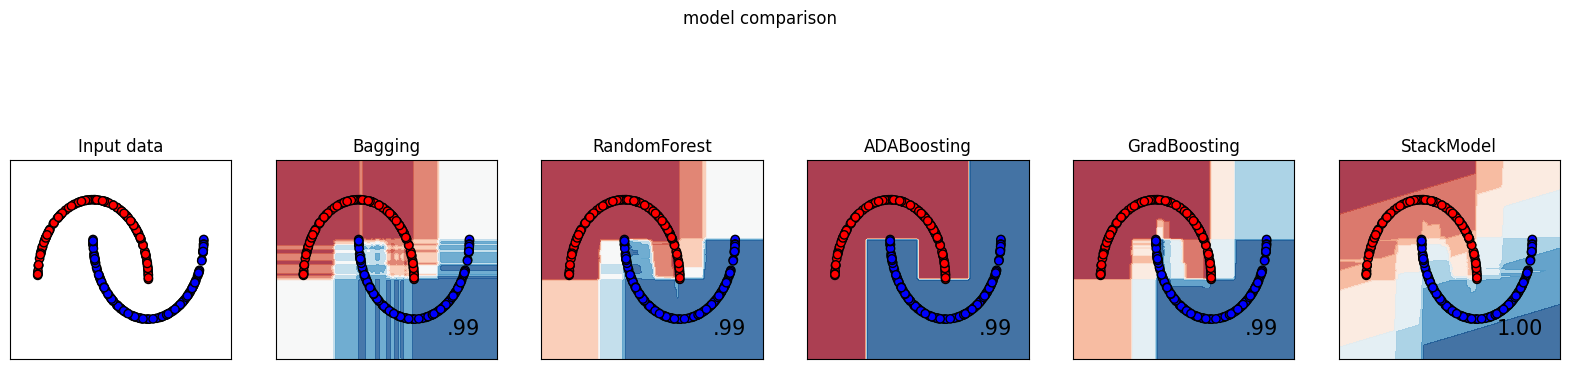

In [97]:
# making a dictionary of the best models
model_dict = {'Bagging': bagging_clf,
              'RandomForest': rf_clf,
              'ADABoosting': ada_clf,
              'GradBoosting': grad_clf,
              'StackModel': stack_clf
              }

comparing_plot_maker(XX_train, yy_train, XX_test,  yy_test, model_dict)

This visualization reveals that the Stacking meta-model demonstrates the most intricate margin among the models tested on this dataset. Notably, this model adeptly creates margins that intricately encompass all facets of the dataset, enabling it to achieve a flawless 100% accuracy in predicting the testing dataset. In contrast, the other models perform admirably with a 99% accuracy rate. However, they do not exhibit the same finesse in partitioning margins as prominently as the stacking model. Notably, the Adaptive Boosting model stands out with the sharpest boundaries. This observation suggests that the stacking model's superiority might manifest more profoundly when dealing with intricate and complex datasets.


# Dummy Classifier

One of the ways to understand and improve how well our model works is to create a basic reference point for our data. This is why having a simple model to compare our model's performance is so important, and this is where the Dummy Classifier comes in. A dummy classifier does exactly what its name suggests! It's a type of model that predicts without attempting to uncover any patterns in the data. The basic version of this model mainly checks which label appears most often in the training dataset and then predicts based on that label. [<a href="https://towardsdatascience.com/why-using-a-dummy-classifier-is-a-smart-move-4a55080e3549" target="_blank">link</a>]

Consequently, in this educational notebook, I will introduce the sklearn Dummy classifier that contain different strategies to generate predictions [<a href="https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html" target="_blank">link</a>]. The parameters are as follows

1. **strategy**: Strategy to use to generate predictions.

    “most_frequent”: the predict method always returns the most frequent class label in the observed y argument passed to fit. The predict_proba method returns the matching one-hot encoded vector.

    “prior”: the predict method always returns the most frequent class label in the observed y argument passed to fit (like “most_frequent”). predict_proba always returns the empirical class distribution of y also known as the empirical class prior distribution.

    “stratified”: the predict_proba method randomly samples one-hot vectors from a multinomial distribution parametrized by the empirical class prior probabilities. The predict method returns the class label which got probability one in the one-hot vector of predict_proba. Each sampled row of both methods is therefore independent and identically distributed.

    “uniform”: generates predictions uniformly at random from the list of unique classes observed in y, i.e. each class has equal probability.

    “constant”: always predicts a constant label that is provided by the user. This is useful for metrics that evaluate a non-majority class.

In [100]:
# Make a dummy classifier by using 'most frequent' strategy
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [102]:
pred = dummy_clf.predict(X_test)
accuracy_score(y_test, pred)

0.5

As evident, it achieved an accuracy of 50 percent. This dummy classifier employs a 'most frequent' strategy, revealing that the dataset is evenly balanced between these two classes. Therefore, neither of the classes holds a numerical advantage in terms of sample count within the dataset.

Also, one can see this by using confusion matrix

In [104]:
cm = confusion_matrix(y_test, pred)

print(f'Confusion Matrix:\n{cm}')

Confusion Matrix:
[[  0 125]
 [  0 125]]


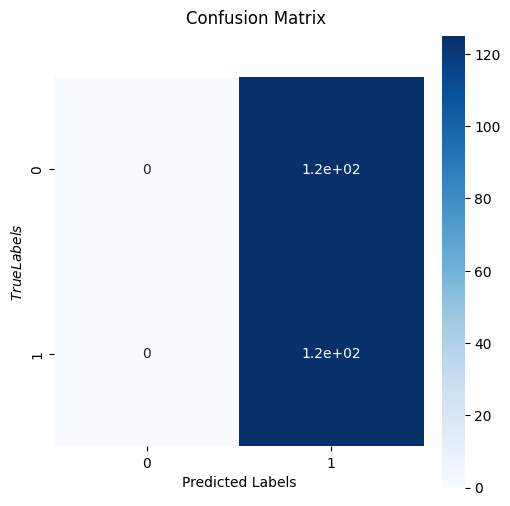

In [113]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), layout='constrained')

fig.suptitle('Confusion Matrix')
# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', ax=axes)
axes.set(aspect='equal',
            xlabel='Predicted Labels',
           ylabel='$True Labels$')

plt.show()